In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-data/wine_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df = pd.read_csv('/kaggle/input/wine-data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [11]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

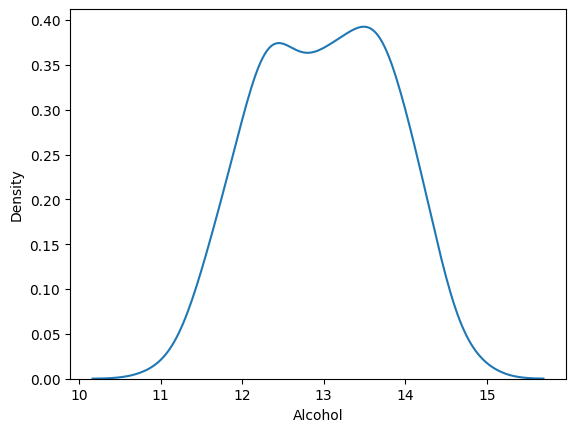

In [12]:
sns.kdeplot(df["Alcohol"])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic acid', ylabel='Density'>

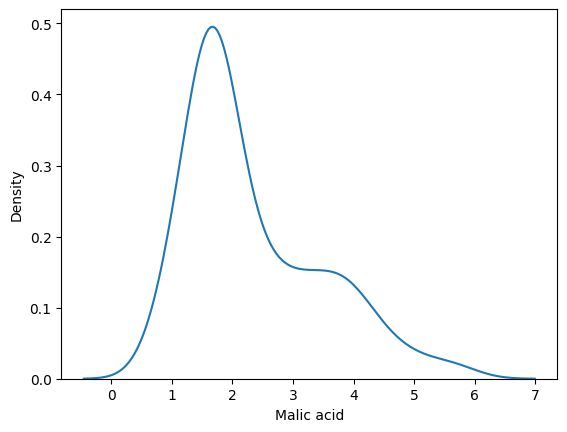

In [13]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

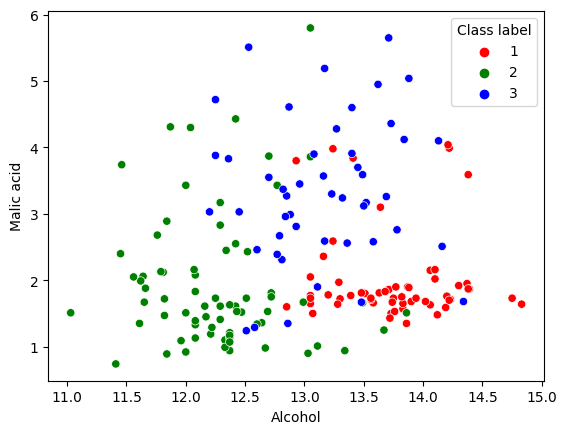

In [16]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x='Alcohol',y='Malic acid',hue = 'Class label',data = df,palette = color_dict)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis = 1),
                                                df['Class label'],
                                                test_size = 0.3,
                                                random_state= 0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [26]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


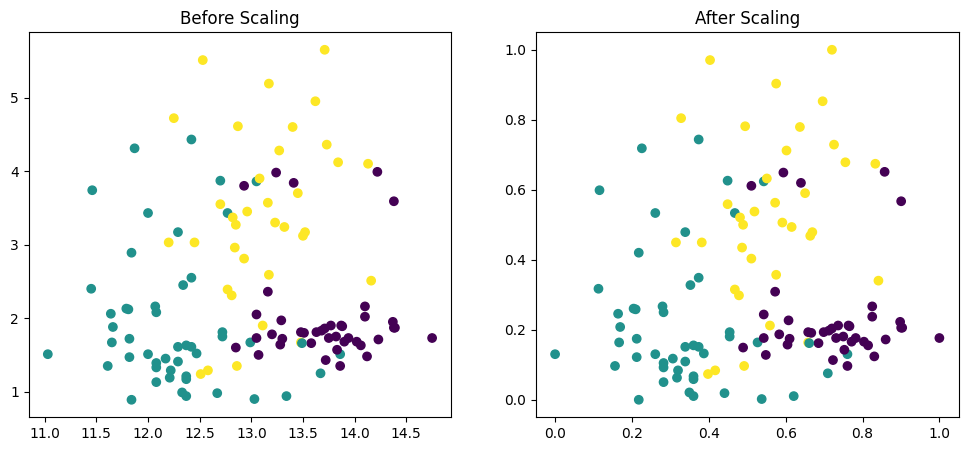

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

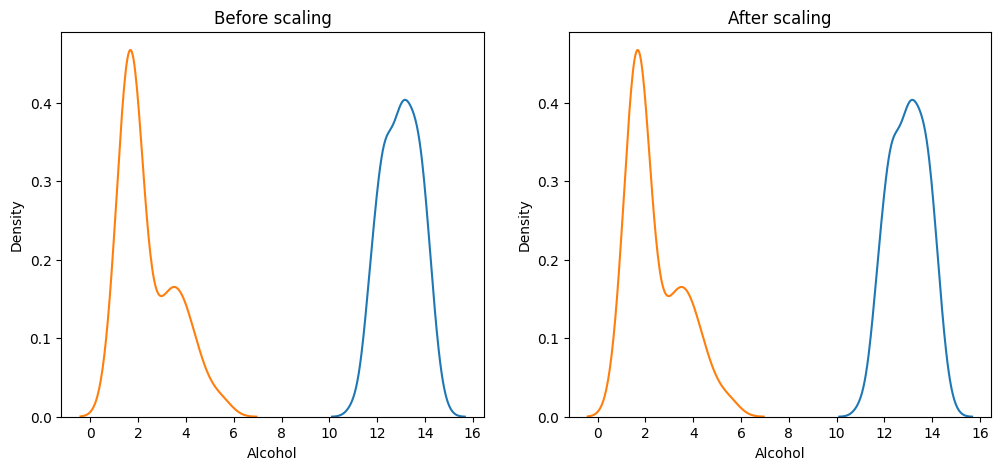

In [29]:
fig,(ax1,ax2)  = plt.subplots(ncols =2,figsize= (12,5))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Alcohol'],ax = ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title('After scaling')
sns.kdeplot(X_train['Alcohol'],ax = ax2)
sns.kdeplot(X_train['Malic acid'],ax = ax2)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


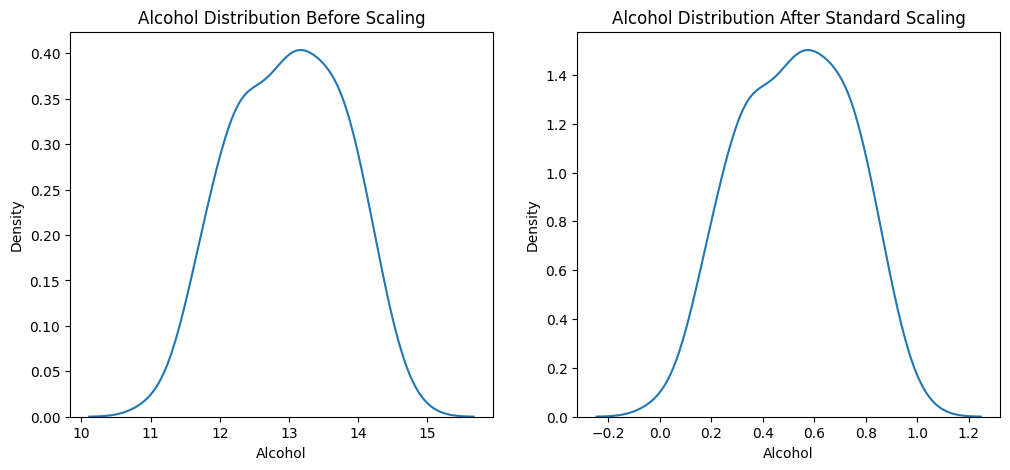

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


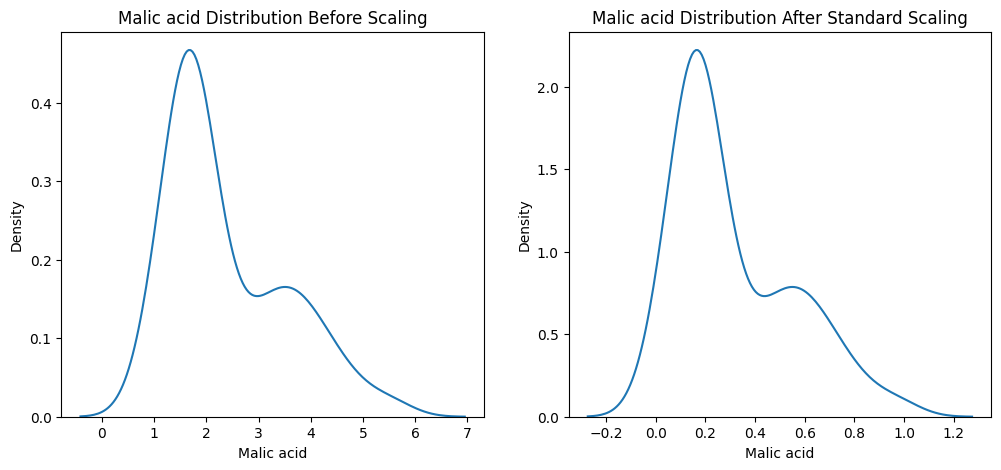

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()